In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import metrics 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [3]:
#loading data
file_1="/workspaces/State-of-Health-Estimation-Battery/Dataset/B0005_dis_dataset.csv"
dataset=pd.read_csv(file_1)

C_max=2

#renaming columns for simplicity
dataset.columns=['cycle',"capacity",'voltage', 'current','temperature', 'current_load', 'voltage_load',"time"]
dataset["current_load"]= abs(dataset["current_load"])

#removing ideling / starting and ending current level data  
df=dataset[(dataset.current_load>=0.006)].reset_index(drop=True)

# converting time seconds->hour
df["time"]=df["time"]/3600

#calculate Soc for each cycle
cycle_count=df["cycle"].unique()
Soc_list=[]

# Update Soc for each reading within each cycle using Coulomb counting
for cycle in cycle_count:
    cycle_data = df[df['cycle'] == cycle]
    
    cumulative_Soc = [sum(cycle_data["capacity"])/len(cycle_data["capacity"])]
    
    for i in range(1, len(cycle_data)):
        
        delta_time = cycle_data['time'].iloc[i-1] - cycle_data['time'].iloc[i]
        
        delta_charge = cycle_data['current'].iloc[i] * delta_time
        
        cumulative_Soc.append(cumulative_Soc[-1] -delta_charge)
        
    Soc_list.extend(cumulative_Soc)

#DOD is the opposite of the soc 
df["Soc"] = [(q / C_max) for q in Soc_list]
df["Soh"]=df["capacity"]/C_max


# selecting parameters 
att_=["cycle","capacity","voltage","current","temperature","current_load","voltage_load","time","Soc"]
att=["cycle","current_load","voltage_load","Soc","time"]
X_axis="cycle"

X = df[att]
Y = df[["Soh"]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

In [5]:
#sorting data wrt to index
X_test = X_test.sort_index(axis=0)
X_train= X_train.sort_index(axis=0)
y_train= y_train.sort_index(axis=0)
y_test = y_test.sort_index(axis=0)

In [6]:
svr1= SVR(kernel='rbf', C=1, gamma='scale')
svr1.fit(X_train,y_train.values.ravel())
y_pred_1= svr1.predict(X_test)

In [7]:
svr2= SVR(kernel='linear', C=1, gamma='scale')
svr2.fit(X_train,y_train.values.ravel())
y_pred_2= svr2.predict(X_test)

In [8]:
svr3_1= SVR(kernel='poly', C=1, gamma='scale', degree=1)
svr3_1.fit(X_train,y_train.values.ravel())
y_pred_3_1= svr3_1.predict(X_test)

In [9]:
svr3_2 = SVR(kernel='poly', C=1, gamma='scale', degree=2)
svr3_2.fit(X_train,y_train.values.ravel())
y_pred_3_2= svr3_2.predict(X_test)

In [10]:
svr3_3= SVR(kernel='poly', C=1, gamma='scale', degree=3)
svr3_3.fit(X_train,y_train.values.ravel())
y_pred_3_3= svr3_3.predict(X_test)

In [11]:
svr3_4= SVR(kernel='poly', C=1, gamma='scale', degree=4)
svr3_4.fit(X_train,y_train.values.ravel())
y_pred_3_4= svr3_4.predict(X_test)

In [12]:
svr3_5= SVR(kernel='poly', C=1, gamma='scale', degree=5)
svr3_5.fit(X_train,y_train.values.ravel())
y_pred_3_5= svr3_5.predict(X_test)

In [13]:
def graph_plot(a,model):
    plt.plot(X_test["cycle"],y_test,color='red',label='actual',linewidth=4)
    plt.plot(X_test["cycle"],a,color='cyan',label='SVM-'+model,linewidth=1)
    plt.xlabel("cycle")
    plt.ylabel("SOH")
    rmse="Rmse = "+str(np.sqrt(metrics.mean_squared_error(y_test, a)))
    plt.figtext(0.33, -0.03, rmse, fontsize=10)
    plt.legend(loc="upper right")
    plt.suptitle("Support Vector Regressor kernal:"+model)
    plt.show()
    print(np.sqrt(metrics.mean_squared_error(y_test, a)))

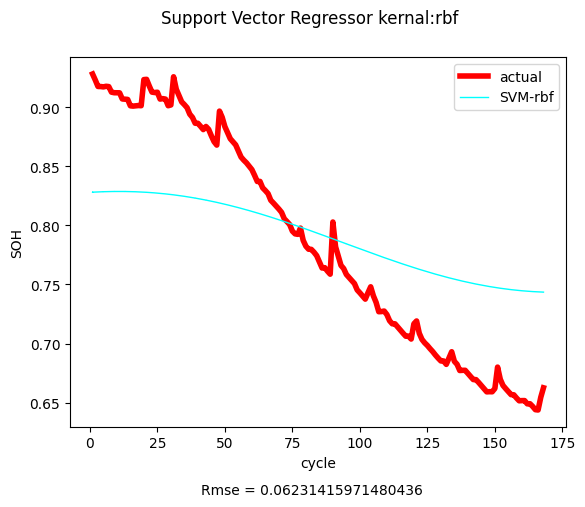

0.06231415971480436


In [14]:
graph_plot(y_pred_1,"rbf")

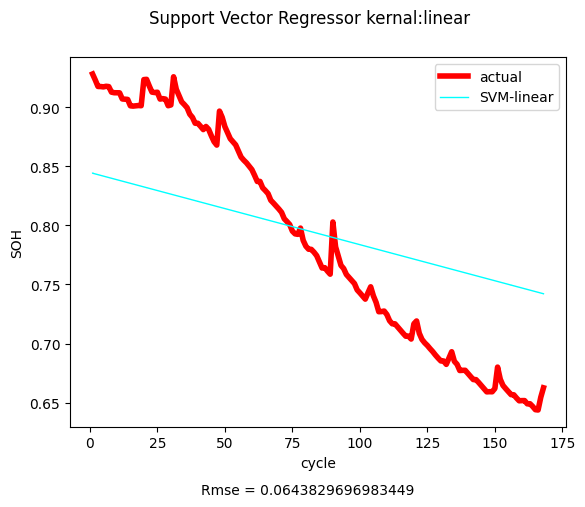

0.0643829696983449


In [15]:
graph_plot(y_pred_2,"linear")

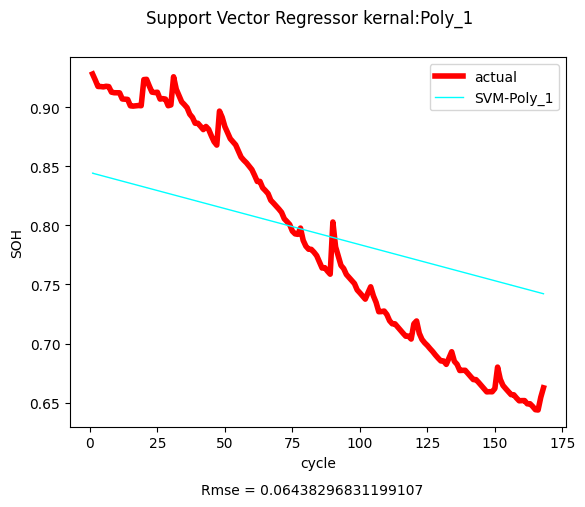

0.06438296831199107


In [16]:
graph_plot(y_pred_3_1,"Poly_1")

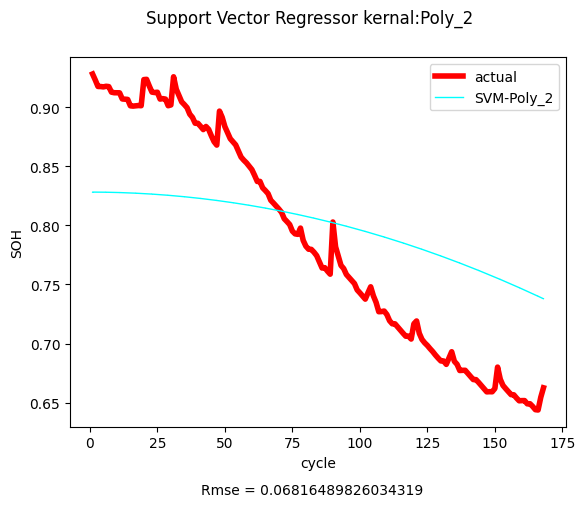

0.06816489826034319


In [17]:
graph_plot(y_pred_3_2,"Poly_2")

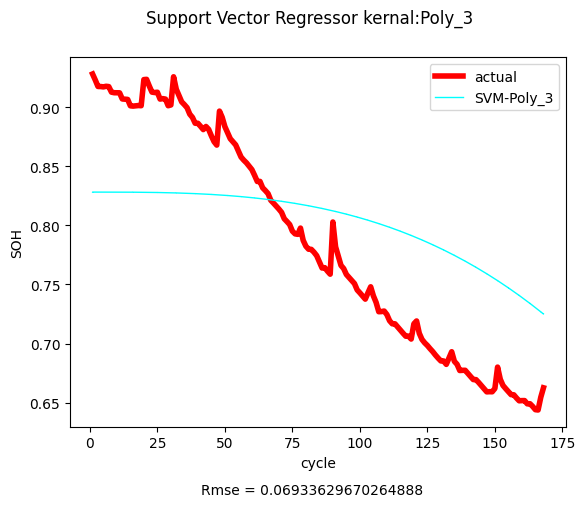

0.06933629670264888


In [18]:
graph_plot(y_pred_3_3,"Poly_3")

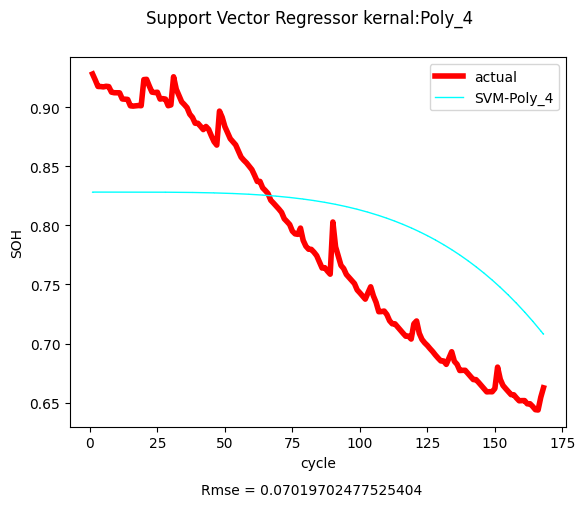

0.07019702477525404


In [19]:
graph_plot(y_pred_3_4,"Poly_4")

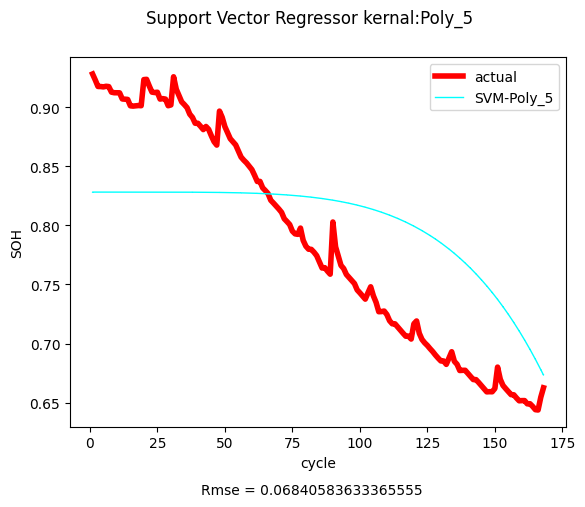

0.06840583633365555


In [20]:
graph_plot(y_pred_3_5,"Poly_5")